# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [1]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [4]:
simulation = lab.experiment(
    height=30, width=50,
    initial_population_count=400,
    max_total_duration=120, max_simulation_duration=4
)

Generating universe...	: Done in 0.000 s


Running simulation	:  50%|█████     | 2/4 [00:01<00:01,  1.05it/s]

Simulation early stop	: All entities died.
Simulation succeed...	: Returning data... Done in 2.170 s


## Analysis

### Statistics

#### Gathering & computing

In [5]:
print(simulation["universe"].population[2].death_date)

168414761


In [6]:
#stats = lab.gather_data(simulation)

In [7]:
#stats["agents_statistics"].to_csv("results/stats.csv")

#### Plotting some stats

In [8]:
#lab.plot_generation_stats(stats)

### Timelines

#### Population count

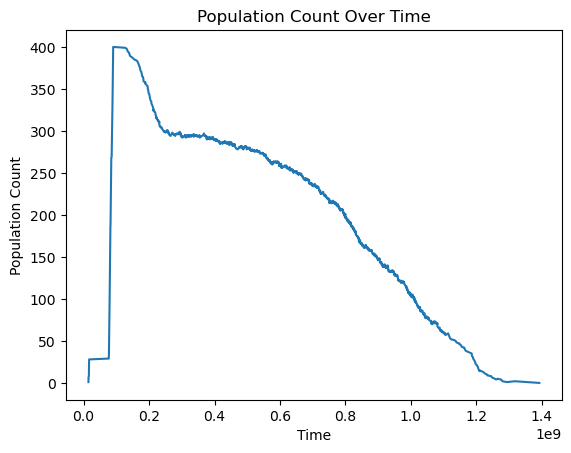

In [9]:
from matplotlib import pyplot as plt  # TODO Move to Lab
population_timeline = lab.get_temporal_data(simulation)
population_timeline.plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

In [10]:
spatial_data = lab.get_spatial_data(simulation)

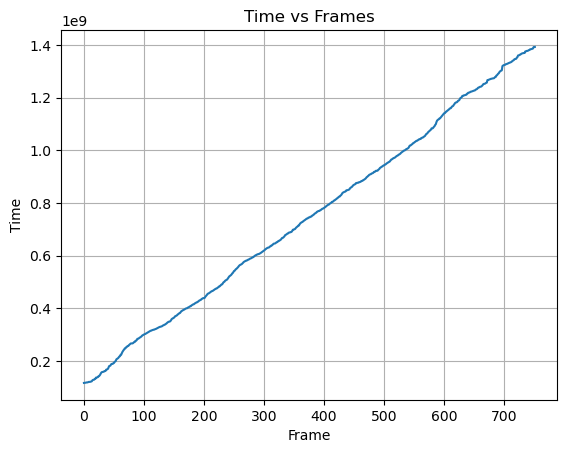

752


In [11]:
import matplotlib.pyplot as plt

positions = spatial_data[0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(spatial_data[1]))

In [12]:
import imageio


gif_path = "results/output.gif"
imageio.mimsave(gif_path, spatial_data[1], duration=0.01, loop=0)

In [13]:
from IPython.display import HTML
width = 1000
# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [14]:
import numpy as np
import tifffile

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(spatial_data[1], axis=0)

# Save the stack as a TIFF file
tifffile.imwrite('results/stacks/positions.tif', stack_3d)

In [15]:
import json

with open('results/positions.json', 'w') as json_file:
    json.dump(spatial_data[2], json_file)

In [16]:
import json

with open('results/timestamps.json', 'w') as json_file:
    json.dump(spatial_data[0], json_file)

[ 117174352  117451326  117948215  118088089  118903170  119152071
  120307815  121019481  121118317  121672655  122350296  123197207
  126768478  128498288  128901109  129579361  132172823  132561979
  137259879  138385126  138667871  142316398  142543066  145318402
  148280361  152955959  156517993  158263642  158855371  159285925
  159748319  161917078  162087350  162872264  167395584  167662739
  169440149  170579773  175996252  181261595  181957570  182586028
  186763485  189140528  189309007  189619634  192143334  192620426
  197339817  198416001  200474532  206594751  208284936  209907233
  211462012  214669825  217592981  218465220  223847965  224275102
  229798072  234525187  238468161  241680002  244148057  248346413
  248531814  251116610  254444170  254771459  257440864  257726995
  260700877  262695587  264131231  266914863  267090765  267269633
  268668919  270957495  273090026  273290304  277265508  277610150
  280036086  284574384  284805782  285800983  287626924  28947

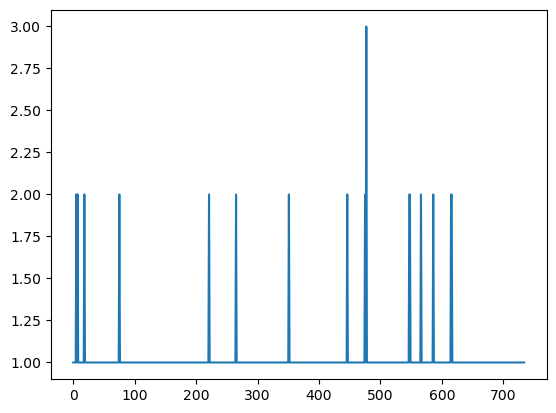

In [17]:
unique_values, counts = np.unique(spatial_data[0], return_counts=True)
print(unique_values)
print(counts)
# Creating bar plot
plt.plot(counts)


#### Actions

In [18]:
timeline = lab.get_timeline(simulation)
timeline

[{'id': 0,
  'decision': 'Abilities.spawn',
  'action_time': 14662967,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 1,
  'decision': 'Abilities.spawn',
  'action_time': 14713012,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 2,
  'decision': 'Abilities.spawn',
  'action_time': 14751204,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 3,
  'decision': 'Abilities.spawn',
  'action_time': 14794256,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 4,
  'decision': 'Abilities.spawn',
  'action_time': 14829632,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 5,
  'decision': 'Abilities.spawn',
  'action_time': 14874487,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id': 6,
  'decision': 'Abilities.spawn',
  'action_time': 14907269,
  'action_success': True,
  'reaction_time': 0,
  'decision_time': 0},
 {'id'

In [19]:
with open('results/timeline.json', 'w') as json_file:
    json.dump(timeline, json_file)

In [20]:
agents_data = lab.get_agents_data(simulation)
with open('results/agents_data.json', 'w') as json_file:
    json.dump(agents_data, json_file)

In [21]:
agents_data

{0: {'id': 0,
  'generation': 0,
  'parents': [],
  'start_date': 117307013,
  'death_date': 1021401520,
  'children': [518, 783],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (187, 159, 126)},
 1: {'id': 1,
  'generation': 0,
  'parents': [],
  'start_date': 152682422,
  'death_date': 173625440,
  'children': [],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (99, 207, 184)},
 2: {'id': 2,
  'generation': 0,
  'parents': [],
  'start_date': 117326890,
  'death_date': 168414761,
  'children': [],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (236, 75, 195)},
 3: {'id': 3,
  'generation': 0,
  'parents': [],
  'start_date': 132608457,
  'death_date': 390824686,
  'children': [448],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.

### Relations

In [22]:
from pyvis.network import Network

g = Network(notebook=True)
g.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])

#g.show('results/relations.html')

## Miscellaneous

In [23]:
from src.Brain import Abilities

eat = [Abilities.eat_bot, Abilities.eat_right, Abilities.eat_left, Abilities.eat_top]
eating = [a for a in simulation["universe"].population[11].actions if a[2] in eat]
eating_success = [a for a in eating if a[4]]
print(len(simulation["universe"].population[11].actions), len(eating), len(eating_success))
for a in eating_success:
    print(a)

KeyError: 2

In [ ]:
max_death_date = 0
last_dead = -1

for a in simulation["universe"].population.values():
    if a.death_date > max_death_date:
        max_death_date = a.death_date
        last_dead = a.id
simulation["universe"].population[last_dead].phenome.color